/home/zuochenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


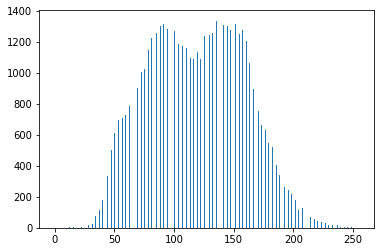

True

In [2]:
#21 直方图归一化
#灰度变换 
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hist_normalization(img, a=0, b=255):
    c = img.min()
    d = img.max()

    out = img.copy()

    #这里在调试过程中会出现超出范围的情况 所以需要后面两行
    #理论计算中是不会超出去的 应该是和浮点计算有关
    out = (b-a) / (d-c) * (out - c) + a
    out[out < a] = a
    out[out > b] = b
    out = out.astype(np.uint8)
    
    return out
    
img = cv2.imread("imori_dark.jpg").astype(np.float)
H, W, C = img.shape

# histogram normalization
out = hist_normalization(img)

# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("myanswers/out_21_2.png")
plt.show()

cv2.imwrite("myanswers/out_21_1.jpg",out)


/home/zuochenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


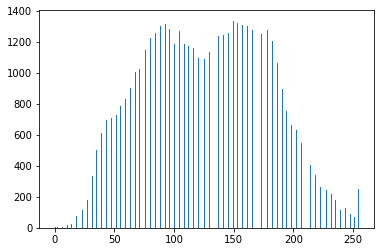

True

In [4]:
#22 直方图操作
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 对图像浮点读取之后进行运算，注意处理最大值和最小值出界问题
def hist_mani(img, m0=128, s0=52):
    out = img.copy()

    m = np.mean(img)
    s = np.std(img)

    out = s0 / s * (out - m) + m0
    out[out < 0] = 0
    out[out > 255] = 255

    out = out.astype(np.uint8)
    return out

img = cv2.imread("imori_dark.jpg").astype(np.float)

out = hist_mani(img)

# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("myanswers/out_22_2.png")
plt.show()

# Save result
cv2.imwrite("myanswers/out_22_1.jpg", out) 

/home/zuochenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


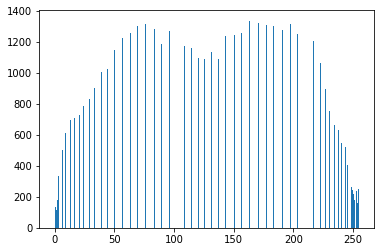

True

In [9]:
#23 直方图均衡化
#使直方图变得平坦
#累计分布函数：对于离散变量而言，所有小于等于a的值出现概率的和
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hist_equalization(img,z_max=255):
    H, W, C = img.shape
    S = H * W * C * 1.

    out = img.copy()
    sum_h = 0.

    for i in range(1,z_max):
        ind = np.where(img == i)
        sum_h += len(img[ind])
        z_prime = z_max / S * sum_h
        out[ind] = z_prime
    
    out = out.astype(np.uint8)

    return out
    
img = cv2.imread("imori_dark.jpg").astype(np.float)


# histogram normalization
out = hist_equalization(img)

# Display histogram
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))
plt.savefig("myanswers/out_23_2.png")
plt.show()

cv2.imwrite("myanswers/out_23_1.jpg",out)


In [11]:
# 24 伽马矫正
# 预先增大RGB的值来排除显示器的影响，修正图像
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(img, c=1, g=2.2):
    out = img.copy()
    out /= 255.

    out = (1/c)*(out**(1/g))

    out *= 255
    out = out.astype(np.uint8)

    return out

# Read image
img = cv2.imread("imori_gamma.jpg").astype(np.float)

# Gammma correction
out = gamma_correction(img, c=1, g=2.2)

cv2.imwrite("myanswers/out_24.jpg", out)

/home/zuochenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


True

In [2]:
# 25 最近邻插值
# 放大图像，补充像素取最临近
import cv2
import numpy as np
import matplotlib.pyplot as plt

def nn_interpolate(img, ax=1, ay=1):
    H,W,_ = img.shape

    aH = int(ay * H)
    aW = int(ax * W)

    y = np.arange(aH).repeat(aW).reshape(aW,-1) #横坐标为W，纵坐标为H
    # np.tile将原矩阵横向、纵向复制
    x = np.tile(np.arange(aW), (aH, 1))
    # x = np.arange(aW).repeat(aH).reshape(aH, -1)#横坐标为H，纵坐标为W
    y = np.round(y / ay).astype(np.int)
    x = np.round(x / ax).astype(np.int)

    out = img[y, x]
    out = out.astype(np.uint8)
    return out

img = cv2.imread("imori.jpg").astype(np.float)

# Nearest Neighbor
out = nn_interpolate(img, ax=1.5, ay=1.5)

# Save result
cv2.imwrite("myanswers/out_25.jpg", out)

/home/zuochenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/home/zuochenyu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.

True

In [ ]:
# 26 双线性插值

In [ ]:
# 27 双三次插值

In [ ]:
# 28 仿射变换